In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


### Linear Regression Model - ScikitLearn

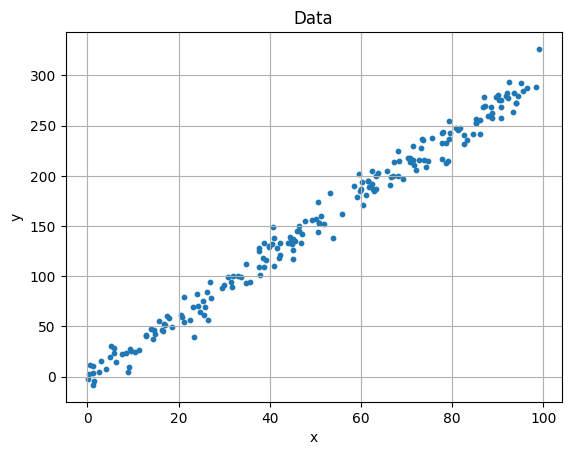

y = 3.02x + -0.36


In [49]:
x = np.random.rand(200, 1) * 100
y = 3 * x.squeeze() + np.random.randn(200) * 10

X = np.array(x).reshape(-1, 1)
Y = np.array(y)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.grid()
plt.show()

model = LinearRegression().fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

equation = f"y = {slope:.2f}x + {intercept:.2f}"
print(equation)

### Matrix

In [99]:
x = np.random.rand(200, 1) * 200
y = 3 * x.squeeze() + np.random.randn(200) * 10

X = np.c_[np.ones((200, 1)), x]

parameter = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
intercept, slope = parameter

y_pred = X.dot(parameter)

mse = np.mean((y - y_pred)**2)

print("Parameters (theta):", parameter)
print("Mean Squared Error:", mse)


Parameters (theta): [-1.16039444  3.00393122]
Mean Squared Error: 88.73003585739538


In [100]:
def linear_regression_function(x,  intercept: float, slope: float):
    return slope * x + intercept

In [101]:
x = np.linspace(1, 200, 1000)
y_hut = linear_regression_function(x=x, intercept=intercept, slope=slope)

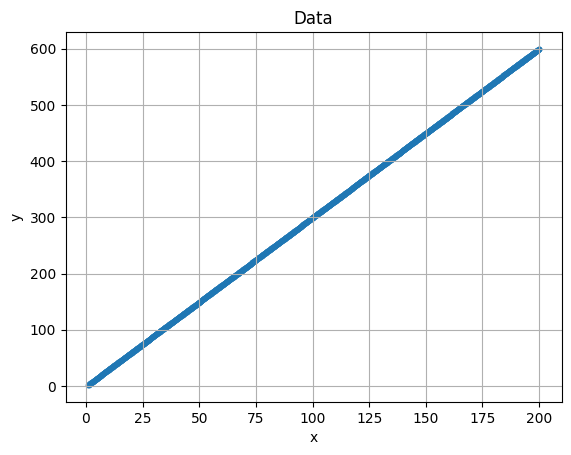

In [103]:
plt.scatter(x, y_hut, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.grid()
plt.show()

### Beispiel für die Prüfung

In [20]:
x = [1.55, 1.57, 1.62, 1.68, 1.75, 1.75, 1.81, 1.83,
     1.87, 1.89, 1.9, 1.92, 1.95, 1.95, 1.99, 2.02]
# Größe in Metern
y = [51, 50, 55, 52, 60, 68, 78, 91, 
     84, 81, 90, 105, 95, 99, 100, 101]
# Gewicht in KG

#### Model

In [38]:
### Berechnung der Parameter durch Formeln
def sx2(X):
    result = 0
    mean = np.mean(X)
    for xi in X:
        result += (xi - mean)**2
    return result / (len(X) - 1)

def sxy(X, Y):
    result = 0
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    for xi, yi in zip(X, Y):
        result += (xi - mean_x) * (yi - mean_y)
    return result / (len(X) - 1)

def beta(x, y):
    return sxy(x, y) / sx2(x)

def alpha(x, y):
    return np.mean(y) - beta(x, y) * np.mean(x)

b = beta(x, y)
a = alpha(x, y)

print("--------- Formeln ----------")
print(f"y = {b:.2f}x {a:.2f} \n")

### Berechnung der Parameter durch Matrix

def matrix_approach(x, y):
    design_matrix = np.c_[np.ones((len(x), 1)), x]
    X = design_matrix
    Y = np.array(y)
    Xt = X.T

    B = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return B

a, b = matrix_approach(x, y)

print("--------- Matrix ----------")
print(f"y = {b:.2f}x {a:.2f}")

--------- Formeln ----------
y = 127.18x -152.17 

--------- Matrix ----------
y = 127.18x -152.17


In [39]:
def model(a, b, xi):
    a, b = matrix_approach(x, y)
    return a + b * xi

#### Plot

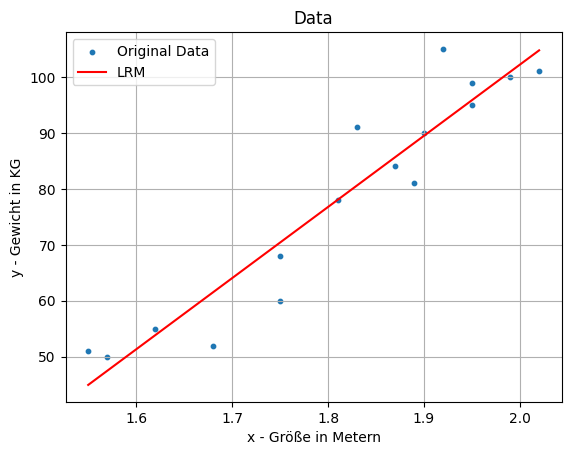

In [46]:
def plot(x, y):
    plt.scatter(x, y, s=10, label="Original Data")
    plt.plot(x, [model(a, b, xi) for xi in x], color='red', label="LRM")
    plt.xlabel('x - Größe in Metern')
    plt.ylabel('y - Gewicht in KG')
    plt.title('Data')
    plt.grid()
    plt.legend()
    plt.show()
    
plot(x, y)

#### Tests und Konfidenzintervalle

In [47]:
def residuals(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append(y[i] - model(a, b, x[i]))
    return res

def residuals_var(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append((y[i] - model(a, b, x[i]))**2)
    return sum(res) / (len(y) - 2)

def s_alpha2(x, var_x, var_residuals):
    return ((1 / len(x)) + (np.mean(x)**2) / ((len(x) - 1) * var_x)) * var_residuals

def s_beta2(x, var_x, var_residuals):
    return (1 / ((len(x) - 1) * var_x)) * var_residuals